In [2]:
#importing all of the data we already calculated in setup
# + importing reconv functions

from conv_reproj_withplots import match
from header_setup import data_hr, data_lr, info_hr, info_lr, datas

In [3]:
from matplotlib import pyplot as plt
import numpy as np

Plotting all of our data in different units pre reprojection. PM correction already happened in initial setup

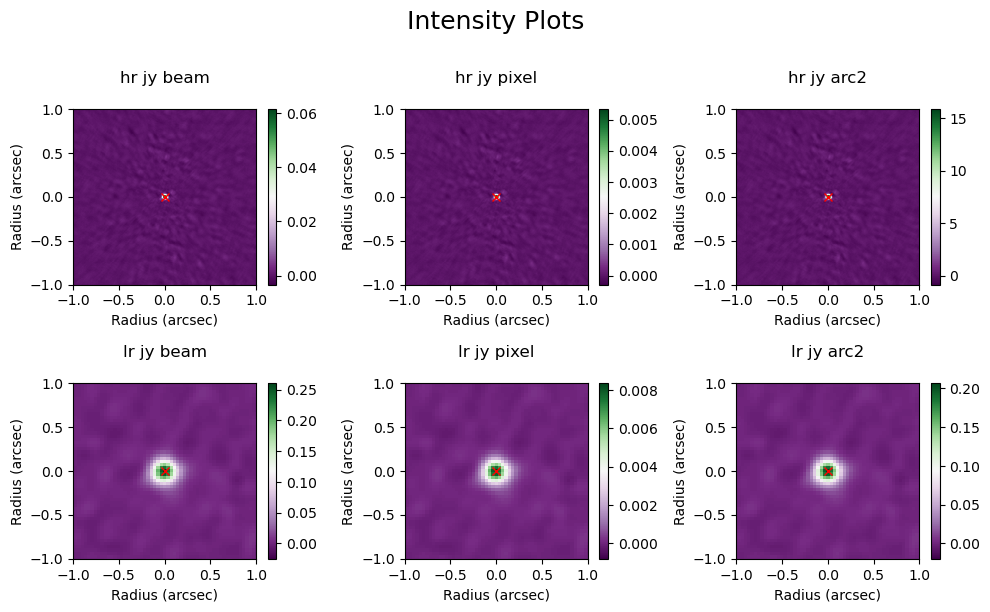

In [4]:
figure,axs = plt.subplots(nrows = 2, ncols=3, figsize = (10,6))#, subplot_kw={'projection': wcs})
figure.suptitle("Intensity Plots", fontsize = 18, y=1.01)

c=0
titles= ['hr jy beam', 'hr jy pixel','hr jy arc2','lr jy beam', 'lr jy pixel',  'lr jy arc2']
info=info_hr

for i,ax in zip(range(len(datas)), axs.ravel()):
     
     if c==3:
          info = info_lr


     x = info['position'][0]*info['pix_size_arcsec'].value
     y = info['position'][1]*info['pix_size_arcsec'].value

     xaxis = range(datas[i].shape[2])*info['pix_size_arcsec'].value-x
     yaxis = range(datas[i].shape[3])*info['pix_size_arcsec'].value-y

     err=1
     ax.set_xlim(-err,err)
     ax.set_ylim(-err,err)

     im = ax.pcolormesh(yaxis,xaxis,datas[i][0,0,...], cmap="PRGn",shading="nearest")

     ax.plot(0,0,'rx')

     ax.set_title(titles[i], y =1.1)
     ax.set_xlabel("Radius (arcsec)")
     ax.set_ylabel("Radius (arcsec)")
     figure.colorbar(im,ax=ax)

     c+=1


figure.tight_layout(pad = 1)
plt.show()


## Reprojection

bmajpix, bminpix:  37.708688084491534 32.44126558022007
bmajsigma, bminsigma:  16.01340542520986 13.776537043107128
convolution complete.


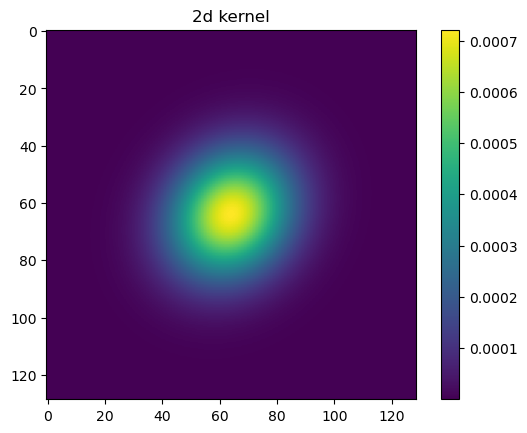

starting reprojection...


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


data_hr:  0.5752931237220764
convovled_hr_pix:  0.607574462890625
reproj_hr_pix:  0.6263396017604123
reproj_hr_pix_norm:  0.3814330279206908

reproj_hr_arc:  15.495968313901841
reproj_hr_arc_norm:  9.43685198560319
(440, 439)
<class 'astropy.units.quantity.Quantity'> <class 'astropy.units.quantity.Quantity'>


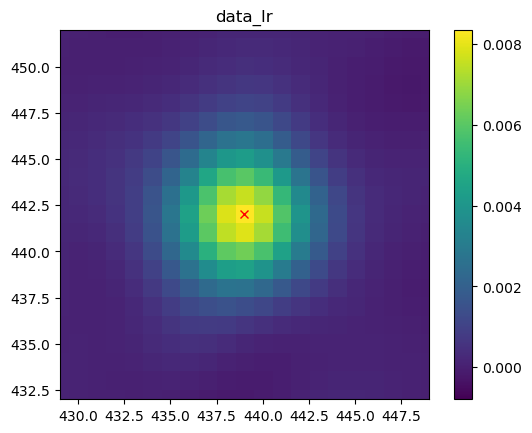

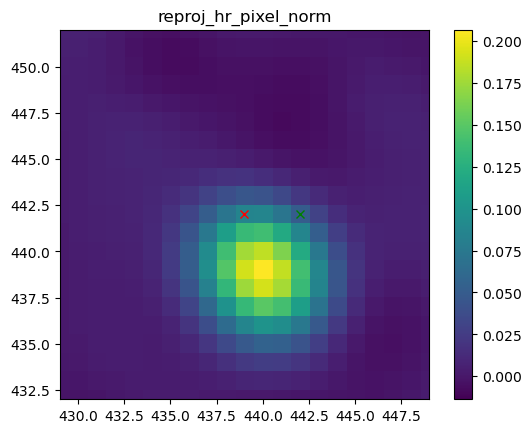

In [5]:
data_reproj, info_reproj = match(data_hr['jy_pix'],data_lr['jy_pix'], info_hr, info_lr)

In [6]:
from align_and_diff_withplots import a_d

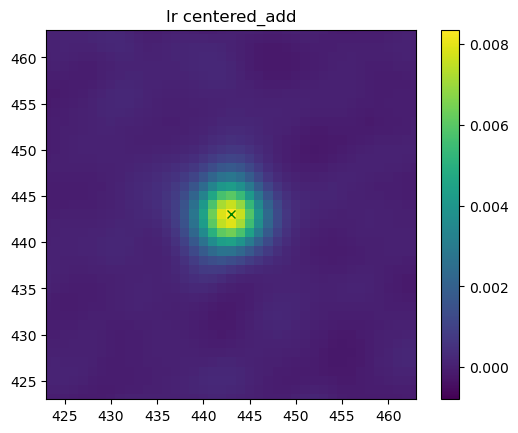

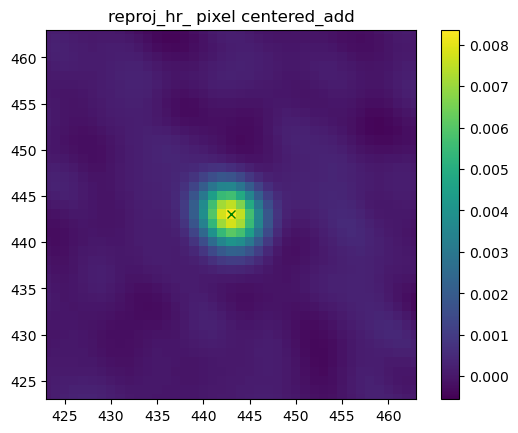

In [7]:
data_csm = a_d(data_reproj['jy_pix_norm'], data_lr['jy_pix'], info_reproj,info_lr)

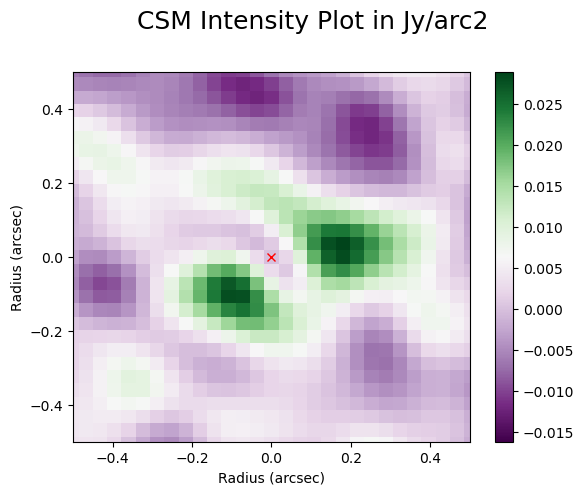

In [8]:
fig, ax = plt.subplots() 
fig.suptitle("CSM Intensity Plot in Jy/arc2", fontsize = 18, y=1.01)

x = (data_csm['jy_arc2'].shape[0]/2)*info_lr['pix_size_arcsec'].value
y = (data_csm['jy_arc2'].shape[0]/2)*info_lr['pix_size_arcsec'].value

xaxis = range(data_csm['jy_arc2'].shape[0])*info_lr['pix_size_arcsec'].value-x
yaxis = range(data_csm['jy_arc2'].shape[1])*info_lr['pix_size_arcsec'].value-y

err=.5
ax.set_xlim(-err,err)
ax.set_ylim(-err,err)

im = ax.pcolormesh(yaxis,xaxis,data_csm['jy_arc2'], cmap='PRGn',shading="nearest")

ax.plot(0,0,'rx')

ax.set_xlabel("Radius (arcsec)")
ax.set_ylabel("Radius (arcsec)")
figure.colorbar(im,ax=ax)


figure.tight_layout(pad = 1)
plt.show()